# Legend

In [2]:
import matplotlib.pyplot as plt

**Legend Entry**

    A legend is made up of one or more legend entries. An entry is made up of exactly one key and one label.

**Legend Key**

    The colored/patterned marker to the left of each legend label.

**Legend Label**

    The text which describes the handle represented by the key.

**Legend Handle** 

    The original object which is used to generate an appropriate entry in the legend.

## Controlling The Legend Entries

Calling `legend` with no arguments automatically fetches the legend handles and their associated labels. This functionality is equivalent to:

In [ ]:
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

The `get_legend_handles_labels()` function returns a list of handles/artists which exist on the Axes which can be used to generate entries for the resulting legend - it is worth noting however that not all artists can be added to a legend, at which point a "proxy" will have to be created.

For full control of what is being added to the legend, it is common to pass the appropriate handles directly to `legend`:

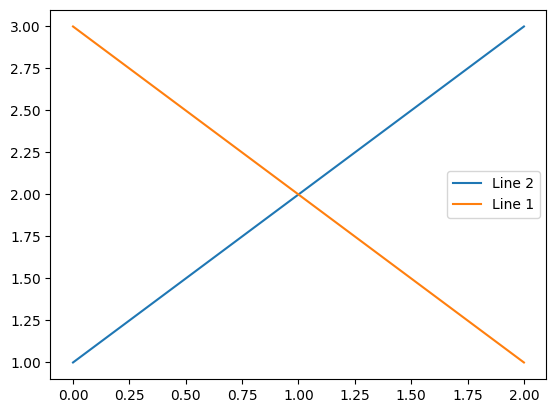

In [ ]:
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label='Line 2')
line_down, = ax.plot([3, 2, 1], label='Line 1')
ax.legend(handles=[line_up, line_down])

### Renaming Legend Entries

When the labels cannot be set on the handles, they can be directly passed to `Axes.legend`:

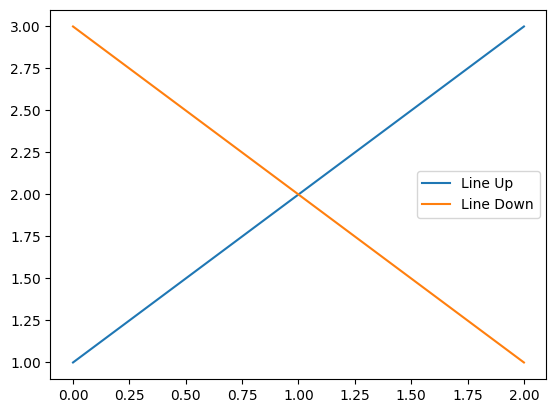

In [ ]:
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label='Line 2')
line_down, = ax.plot([3, 2, 1], label='Line 1')
ax.legend([line_up, line_down], ['Line Up', 'Line Down'])

If the handles are not directly accessible, for example when using some Third-party packages, they can be accessed via `Axes.get_legend_handles_labels`. Here we use a dictionary to rename existing labels:

In [ ]:
my_map = {'Line Up':'Up', 'Line Down':'Down'}

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [my_map[l] for l in labels])

## Creating Artists Specifically for Adding to The Legend (aka. Proxy Artists)

Not all handles can be turned into legend entries automatically,
so it is often necessary to create an artist which *can*. Legend handles
don't have to exist on the Figure or Axes in order to be used.

Suppose we wanted to create a legend which has an entry for some data which
is represented by a red color:

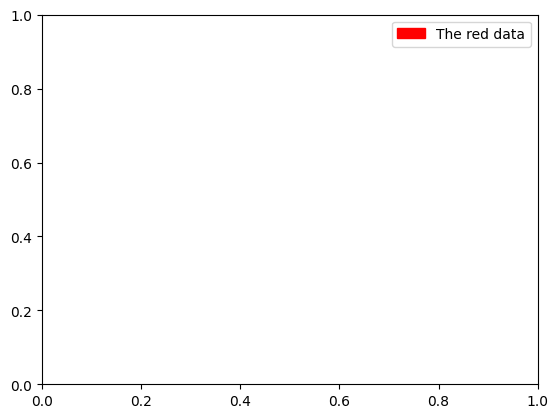

In [5]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
red_patch = mpatches.Patch(color='red', label='The red data')
ax.legend(handles=[red_patch])

plt.show()

There are many supported legend handles. Instead of creating a patch of color we could have created a line with a marker:

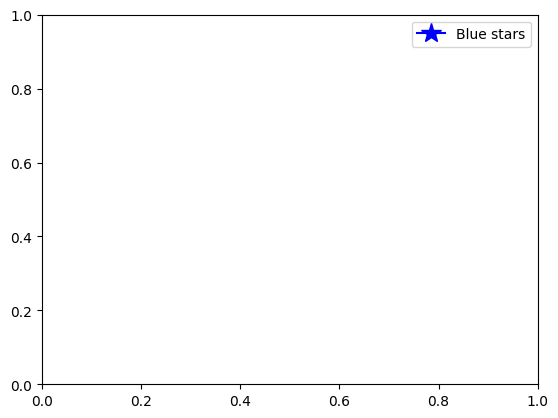

In [6]:
import matplotlib.lines as mlines

fig, ax = plt.subplots()
blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Blue stars')

ax.legend(handles=[blue_line])
plt.show()

## Legend Location

The location of the legend can be specified by the keyword argument loc.

The `bbox_to_anchor` keyword gives a great degree of control for manula legend placement. For example, if you want your Axes legend located at the figure's top right-hand corner instead of the Axes' corner, simply specify the corner's location and the coordinate system of that location:

In [7]:
ax.legend(bbox_to_anchor=(1,1), bbox_transform=fig.transFigure)

C:\Users\iamem\AppData\Local\Temp\ipykernel_46380\4051956087.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1,1), bbox_transform=fig.transFigure)


More examples of custom legend placement:

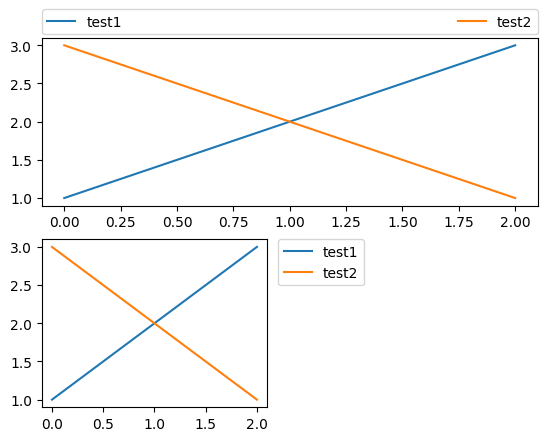

In [8]:
fig, ax_dict = plt.subplot_mosaic([['top', 'top'], ['bottom', 'BLANK']],
                                  empty_sentinel="BLANK")
ax_dict['top'].plot([1, 2, 3], label="test1")
ax_dict['top'].plot([3, 2, 1], label="test2")
# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
ax_dict['top'].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncols=2, mode="expand", borderaxespad=0.)

ax_dict['bottom'].plot([1, 2, 3], label="test1")
ax_dict['bottom'].plot([3, 2, 1], label="test2")
# Place a legend to the right of this smaller subplot.
ax_dict['bottom'].legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

### Figure legends

Sometimes it makes more sense to place a legend relative to the (sub)figure rather than individual Axes.  By using *constrained layout* and specifying "outside" at the beginning of the *loc* keyword argument, the legend is drawn outside the Axes on the (sub)figure.



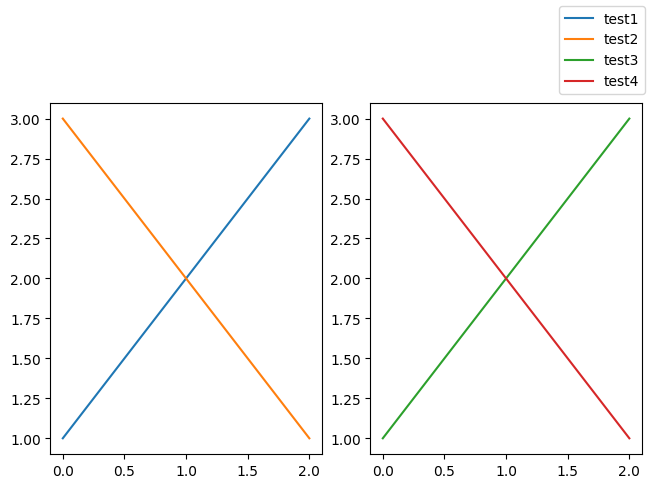

In [9]:
fig, axs = plt.subplot_mosaic([['left', 'right']], layout='constrained')

axs['left'].plot([1, 2, 3], label="test1")
axs['left'].plot([3, 2, 1], label="test2")

axs['right'].plot([1, 2, 3], 'C2', label="test3")
axs['right'].plot([3, 2, 1], 'C3', label="test4")
# Place a legend to the right of this smaller subplot.
fig.legend(loc='outside upper right')

This accepts a slightly diffrent grammer that normal *loc* keyword, where "outside right upper" is diffrent from "outside upper right".

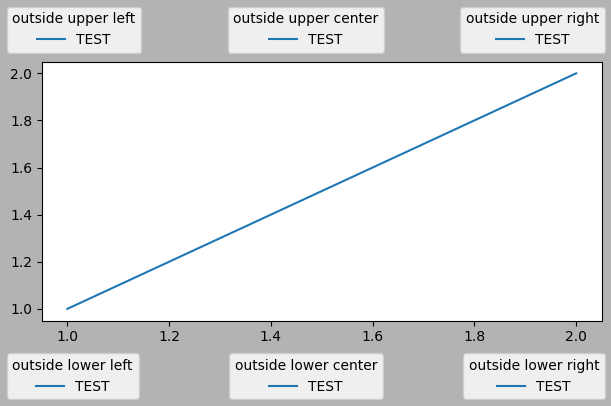

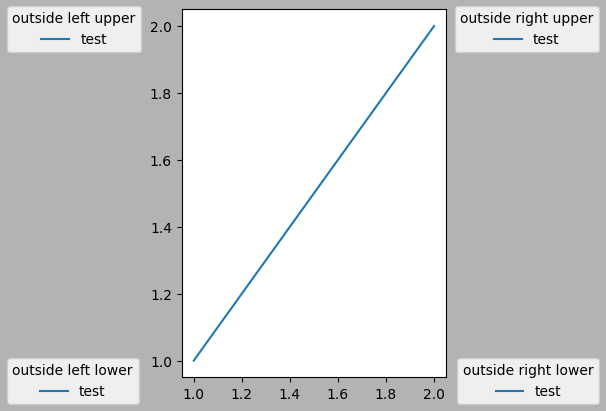

In [10]:
ucl = ['upper', 'center', 'lower']
lcr = ['left', 'center', 'right']
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained', facecolor='0.7')

ax.plot([1, 2], [1, 2], label='TEST')
# Place a legend to the right of this smaller subplot.
for loc in [
        'outside upper left',
        'outside upper center',
        'outside upper right',
        'outside lower left',
        'outside lower center',
        'outside lower right']:
    fig.legend(loc=loc, title=loc)

fig, ax = plt.subplots(figsize=(6, 4), layout='constrained', facecolor='0.7')
ax.plot([1, 2], [1, 2], label='test')

for loc in [
        'outside left upper',
        'outside right upper',
        'outside left lower',
        'outside right lower']:
    fig.legend(loc=loc, title=loc)

## Multiple Legends on The Same Axes

Sometimes it is more clear to split legend entries across multiple legends. Whilst the instinctive approach to doing this might be to call the `legend()` function multiple times, you will find that only one legend ever exists on the Axes. This has been done so that it is possible to call `legend()` repeatedly to update the legend to the latest handles on the Axes. To keep old legend instances, we must add them manually to the Axes:

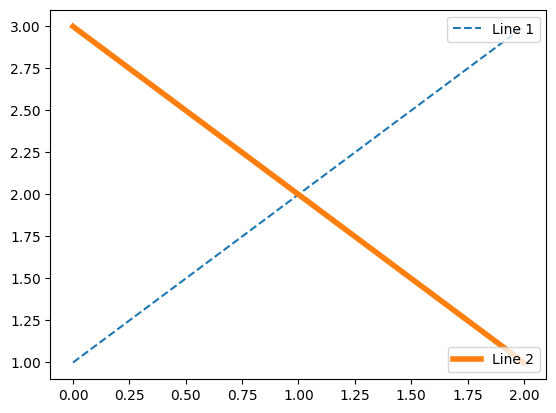

In [11]:
fig, ax = plt.subplots()
line1, = ax.plot([1, 2, 3], label="Line 1", linestyle='--')
line2, = ax.plot([3, 2, 1], label="Line 2", linewidth=4)

# Create a legend for the first line.
first_legend = ax.legend(handles=[line1], loc='upper right')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Create another legend for the second line.
ax.legend(handles=[line2], loc='lower right')

plt.show()

## Legend Handlers

In order to create legend entries, handles are given as an argument to an
appropriate `HandlerBase` subclass.
The choice of handler subclass is determined by the following rules:

1. Update `get_legend_handler_map()`
   with the value in the ``handler_map`` keyword.
2. Check if the ``handle`` is in the newly created ``handler_map``.
3. Check if the type of ``handle`` is in the newly created ``handler_map``.
4. Check if any of the types in the ``handle``'s mro is in the newly
   created ``handler_map``.

For completeness, this logic is mostly implemented in `get_legend_handler()`.

All of this flexibility means that we have the necessary hooks to implement
custom handlers for our own type of legend key.

The simplest example of using custom handlers is to instantiate one of the
existing `legend_handler.HandlerBase` subclasses. For the
sake of simplicity, let's choose `legend_handler.HandlerLine2D`
which accepts a *numpoints* argument (numpoints is also a keyword
on the `legend()` function for convenience). We can then pass the mapping
of instance to Handler as a keyword to legend.


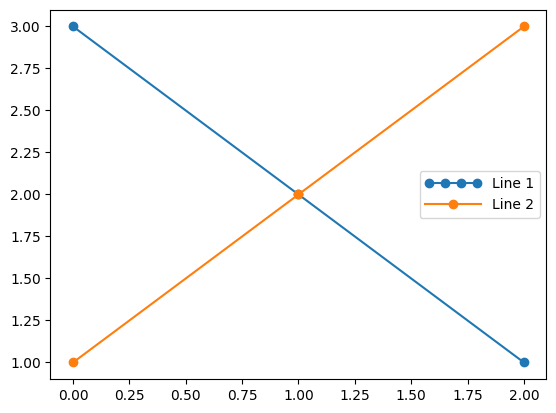

In [12]:
from matplotlib.legend_handler import HandlerLine2D

fig, ax = plt.subplots()
line1, = ax.plot([3, 2, 1], marker='o', label='Line 1')
line2, = ax.plot([1, 2, 3], marker='o', label='Line 2')

ax.legend(handler_map={line1: HandlerLine2D(numpoints=4)}, handlelength=4)

As you can see, "Line 1" now has 4 marker points, where "Line 2" has 2 (the
default). We have also increased the length of the handles with the
``handlelength`` keyword to fit the larger legend entry.
Try the above code, only change the map's key from ``line1`` to
``type(line1)``. Notice how now both `Line2D` instances get 4 markers.

Along with handlers for complex plot types such as errorbars, stem plots
and histograms, the default ``handler_map`` has a special ``tuple`` handler
(`legend_handler.HandlerTuple`) which simply plots the handles on top of one
another for each item in the given tuple. The following example demonstrates
combining two legend keys on top of one another:

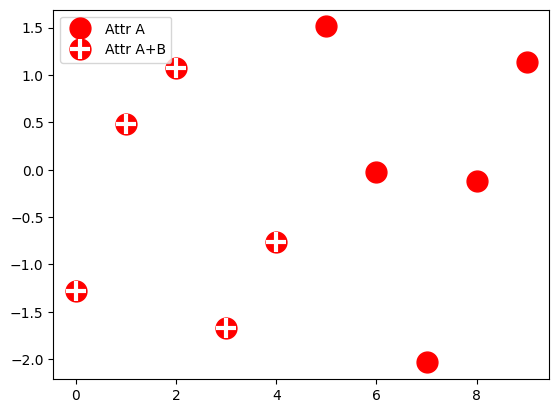

In [13]:
from numpy.random import randn

z = randn(10)

fig, ax = plt.subplots()
red_dot, = ax.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
white_cross, = ax.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

ax.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

The `legend_handler.HandlerTuple` class can also be used to
assign several legend keys to the same entry:

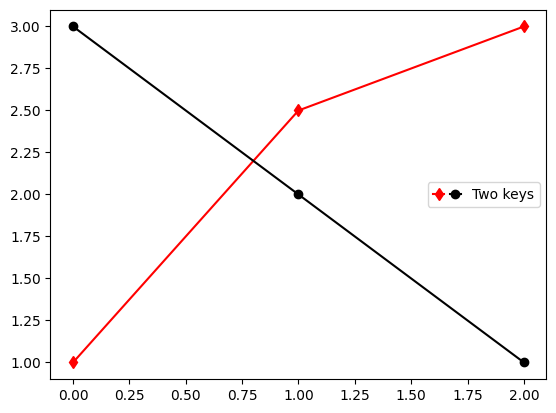

In [14]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

fig, ax = plt.subplots()
p1, = ax.plot([1, 2.5, 3], 'r-d')
p2, = ax.plot([3, 2, 1], 'k-o')

l = ax.legend([(p1, p2)], ['Two keys'], numpoints=1,
              handler_map={tuple: HandlerTuple(ndivide=None)})

### Implementing a Custom Legend Handler

A custom handler can be implemented to turn any handle into a legend key (handles don't necessarily need to be matplotlib artists). The handler must implement a `legend_artist` method which returns a single artist for the legend to use.

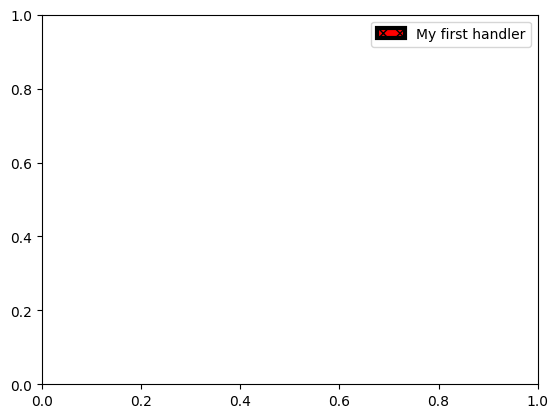

In [15]:
import matplotlib.patches as mpatches


class AnyObject:
    pass


class AnyObjectHandler:
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle([x0, y0], width, height, facecolor='red',
                                   edgecolor='black', hatch='xx', lw=3,
                                   transform=handlebox.get_transform())
        handlebox.add_artist(patch)
        return patch

fig, ax = plt.subplots()

ax.legend([AnyObject()], ['My first handler'],
          handler_map={AnyObject: AnyObjectHandler()})

Alternatively, had we wanted to globally accept ``AnyObject`` instances
without needing to manually set the *handler_map* keyword all the time, we
could have registered the new handler with:

In [16]:
from matplotlib.legend import Legend
Legend.update_default_handler_map({AnyObject: AnyObjectHandler()})

Whilst the power here is clear, remember that there are already many handlers implemented and what you want to achieve may already be easily possible with existing classes. For example, to produce elliptical legend keys, rather than rectangular ones:

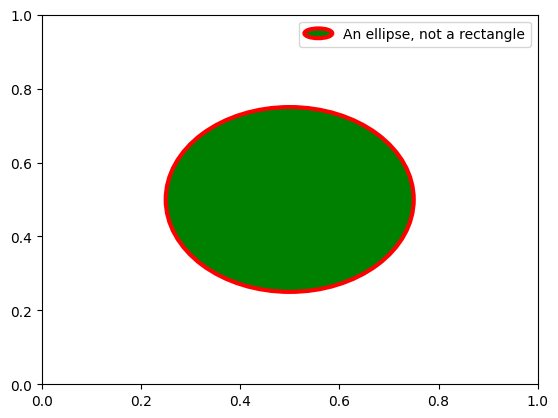

In [17]:
from matplotlib.legend_handler import HandlerPatch


class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]


c = mpatches.Circle((0.5, 0.5), 0.25, facecolor="green",
                    edgecolor="red", linewidth=3)

fig, ax = plt.subplots()

ax.add_patch(c)
ax.legend([c], ["An ellipse, not a rectangle"],
          handler_map={mpatches.Circle: HandlerEllipse()})